In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib as ta
import seaborn as sns
from copy import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
from ta_suite import ta_suite
from ta_signals import ta_signals
from trading import act
from trading import pnl_profile

In [3]:
nifty = pd.read_csv(r"C:\Users\1987h\Downloads\Data science, machine learning and Quant Trading\algorithmic trading\GetZerodhaData\NIFTY 50.csv")
tt = ta_suite(nifty)
df = tt.combine()

In [6]:
# features
features = ['Slowk', 'Slowd','BandSplit_2','BRatio_2','RSI', 'ema_50_21', 'ema_100_50',
       'ema_200_100', 'CCI', 'ATR','SAR', 'CORR','returns']

#preparing the data for training and testing
X = df[features]
y = df['future returns(classifier)']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=False)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)
Xt = pca.fit_transform(X_scaled)

print("number of dimension before reduction: {}".format(X_scaled.shape[-1]))
print("number of dimension after reduction: {}".format(Xt.shape[-1]))

number of dimension before reduction: 13
number of dimension after reduction: 9


In [15]:
X_train,X_test,y_train,y_test=train_test_split(pd.DataFrame(Xt),y,test_size=0.4,shuffle=False)

Now training a Random Forest model on the Dimensionally reduced dataset

In [21]:
rfc=RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {'n_estimators':[100,200,500,1000], \
             'max_depth':[8,10],\
             'max_features': ['auto', 'sqrt', 'log2'],\
             'criterion' :['gini', 'entropy']}

random_search = RandomizedSearchCV(rfc, param_grid, cv=3, random_state=0)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 500, 1000], 'max_depth': [8, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [23]:
model = random_search.best_estimator_

In [24]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5384909751897442

In [26]:
# because returns columns has vanished after dimension reduction
X_tr,X_te,y_tr,y_te=train_test_split(pd.DataFrame(X),y,test_size=0.4,shuffle=False)
X_test['returns'] = X_te['returns']

No handles with labels found to put in legend.


nan
nan


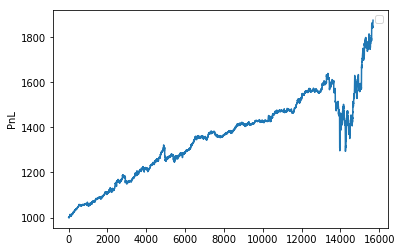

In [27]:
X,pnl = pnl_profile(X_test,y_pred)

This performance is quite better than the performance of Random Forest on simple features

In [35]:
xaxis = df['returns'].rolling(window=10).std().shape[0]

In [83]:
df.columns[6:]

Index(['Slowk', 'Slowd', 'MiddleBand', 'UpperBand_2', 'LowerBand_2',
       'BandSplit_2', 'UpperBand_1', 'LowerBand_1', 'BRatio_2', 'RSI',
       'ema_50_21', 'ema_100_50', 'ema_200_100', 'CCI', 'ATR', 'SAR', 'CORR',
       'returns', 'future returns', 'future returns(classifier)'],
      dtype='object')

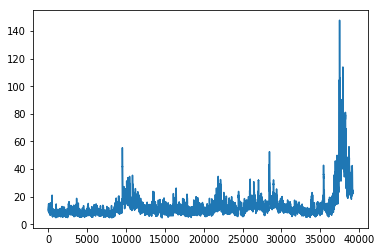

In [113]:
plt.plot(df['ATR'])

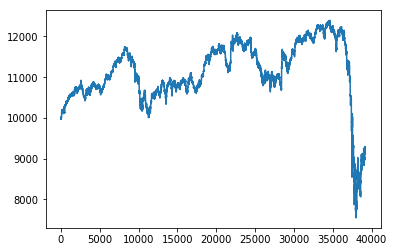

In [111]:
#.rolling(window=10).std()
#df['SAR'].mean()
plt.plot(df['Close'])